In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import constants
from numpy import random

In [15]:
#let's define the two probability distributions
def decayProbability1(t, tau):
    return 1-2**(-t/tau)


def decayProbability2(z, tau):
    return -tau*np.log2(1-z)  

In [48]:
NTl = 1000     # initial atoms of Tl
tau  = 60 * 3.052  # half-life [s]
TimeSteps  = 1500 

Tl = np.empty(TimeSteps)
Pb = np.empty(TimeSteps)


x = random.rand(NTl)
Grid = np.arange(0, TimeSteps, 1)

for time in Grid:
    p = decayProbability1(time,tau)
    survivedTl = x[(x > p)]  # find survived Tl atoms
    SurvivedAtoms = survivedTl.shape[0] 
    
    #save the number of the two spieces atoms in time
    Tl[time], Pb[time] = SurvivedAtoms, NTl - SurvivedAtoms 

       
TlTh = 1000*(2**(-Grid/tau))     #compute theretical value

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


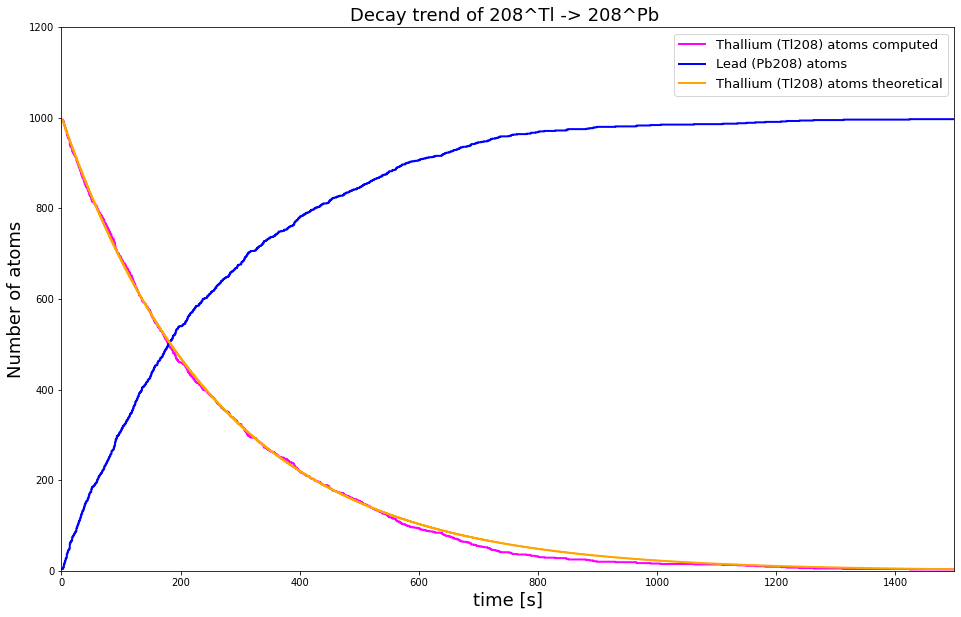

In [49]:
# plot of the two spieces computed trend + the theoretical prediction for Tl

fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Decay trend of 208^Tl -> 208^Pb ', fontsize = 18)
ax.set_xlabel('time [s]', fontsize = 18)
ax.set_xlim(Grid[0], Grid[-1])

ax.set_ylabel('Number of atoms', fontsize = 18)
ax.set_ylim(0, NTl * 1.2)

sns.histplot(x = Grid, weights = Tl, bins = Grid+1, element = 'step', fill = False, lw = 2, color = 'magenta', label = 'Thallium (Tl208) atoms computed')
sns.histplot(x = Grid, weights = Pb, bins = Grid+1, element = 'step', fill = False, lw = 2, color = 'blue', label = 'Lead (Pb208) atoms')
sns.histplot(x = Grid, weights = TlTh, bins = Grid+1, element = 'step', fill = False, lw = 2, color = 'orange', label = 'Thallium (Tl208) atoms theoretical')


plt.legend(loc='best', fontsize=13)
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


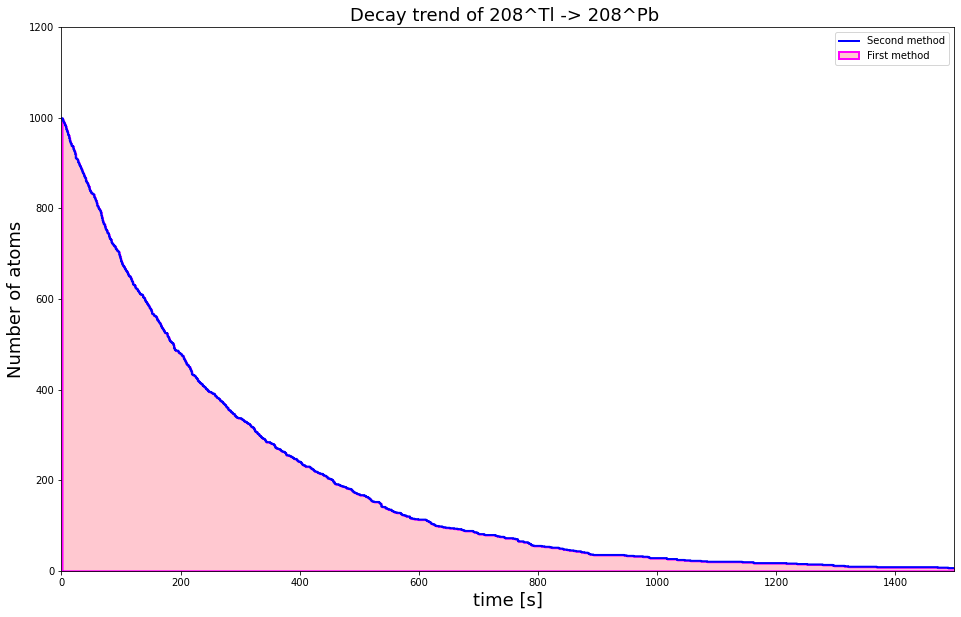

In [56]:
x2 = random.rand(NTl)
Grid2 = np.arange(0, TimeSteps, 1)
w = decayProbability2(x2,tau)

Tl2 = np.empty(TimeSteps)

for time2 in Grid2:
    survivedTl2 = w[w > time2]           
    Tl[time2] = survivedTl2.shape[0]   
    SurvivedAtoms2 = survivedTl2.shape[0]
    Tl2[time2] = SurvivedAtoms2  


#plot
fig, ax = plt.subplots(figsize=(16,10))

ax.set_title('Decay trend of 208^Tl -> 208^Pb ', fontsize = 18)
ax.set_xlabel('time [s]', fontsize = 18)
ax.set_xlim(Grid[0], Grid[-1])

ax.set_ylabel('Number of atoms', fontsize = 18)
ax.set_ylim(0, NTl * 1.2)

#sns.histplot(x = Grid, weights = TlTh, bins = Grid+1, element = 'step', lw = 2, color = 'lightgreen', label = 'Theoretical prediction')
sns.histplot(x = Grid, weights = Tl, bins = Grid+1, element = 'step', fill = True, lw = 2, color = 'lightpink', label = 'First method', edgecolor = 'magenta')
sns.histplot(x = Grid, weights = Tl2, bins = Grid+1, element = 'step', fill = False, lw = 2, color = 'blue', label = 'Second method')

plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [100]:
def f(x):
    return np.sin(1./(x*(2-x)))**2

In [105]:
N  = 10**6 #points number

counter, sumF, sumF2 = 0, 0.,0.

# loop over points
for _ in range(N):
    
    x,y = random.rand()*2, random.rand()
    sumF += f(x)
    sumF2 += f(x)**2
    
    if y<f(x): 
        counter+=1

# finding the two integral values obtained with the two methods
intHitMiss, intMeanValue= 2*counter/N, 2*sumF/N

# setting errors for the two results
p = sumF / N
errHitMiss, errMeanValue = 2*np.sqrt(N*p*(1-p))/N, 2*np.sqrt((sumF2/N - (sumF/N)**2)/N)

print(f'Hit/miss method result:\n I = {intHitMiss:.4f} +/- {errHitMiss:.4f}')
print(f'\nMean value method result:\n I = {int_mv:.4f} +/- {errMeanValue:.4f}')

Hit/miss method result:
 I = 1.4518 +/- 0.0009

Mean value method result:
 I = 2.9024 +/- 0.0005


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [2]:
def S(x):
    if np.sum(x**2) <= 1:
        return 1
    else:
        return 0

In [12]:
N = 1000000

d1, d2 = 2, 10
x1, x2 = random.rand(2*N).reshape(-1,d1), random.rand(10*N).reshape(-1,d2)
c1, c2 = np.sum([S(i) for i in x1]), np.sum([S(j) for j in x2])

V1,V2 = 2**d1 * c1 / N, 2**d2 *  c2 / N



print(f'The {d1}-dimensional-volume is {V1:.3f}')
print(f'The {d2}-dimensional volume is {V2:.3f}')

The 2-dimensional-volume is 3.142
The 10-dimensional volume is 2.549


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [5]:
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return 1/(np.sqrt(x))

In [8]:
N = 1000000
x = random.rand(N)**2

Integral = 2./N * np.sum(f(x)/w(x))
print(f'Integral value:\n{Integral:.5f}') 

Integral value:
0.83900
